## Text Graphics
We can display text in a graphical context to. See the examples below, taken from the matplotlib documentation
at [https://matplotlib.org/3.1.0/gallery/pyplots/text_commands.html#sphx-glr-gallery-pyplots-text-commands-py](https://matplotlib.org/3.1.0/gallery/pyplots/text_commands.html#sphx-glr-gallery-pyplots-text-commands-py)


In [64]:
# First step is to load all required modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import feedparser
import html2text


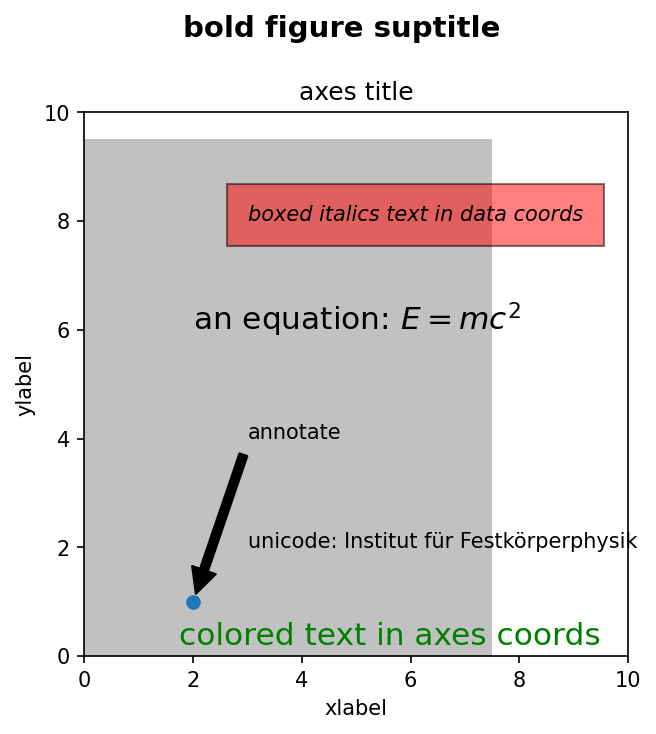

In [86]:
fig = plt.figure(figsize=(8,5),dpi=150)
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')


# we draw an image into the figure first
img = np.ndarray((10,8),dtype=np.uint8)
img.fill(90)
ax.imshow(img,cmap="Greys",vmin=0,vmax=255)

# then we apply some text operations
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.axis([0, 10, 0, 10])

# In Jupyter, the figure will be shown when this cell completes.
# This also destroys the plot.
# Either we save the figure right now or we make a copy to save it later.  
saveFigure = plt.gcf()


## Saving the figure


In [87]:
# we save and load the image in the same fashion as before
# but we use "png" format which gives a better quality for the
# next chapter
TARGET_DIR = "data"
# if the directory doesn't exist, we create it
if not TARGET_DIR in os.listdir():
    os.mkdir(TARGET_DIR)
    
file = "textImage1.png"
saveFigure.savefig(os.path.sep.join([TARGET_DIR,file]))


## Text from the web
We can write our own texts or upload files. But we can also read *feeds* from a variety of internet source, such as newsfeeds from *tagesschau.de*. 

There are many feeds and they all have different structure, so you will need adapt your handle. In this example, this is done by checking if the feed has certain attributes, like title, published data etc. The content (here the summary element) typically is formated as *HTML*, so we use the *html2text* parser to extract plain text.



In [12]:
# html to text parser
hp = html2text.HTML2Text()
hp.ignore_images = True
hp.ignore_emphasis = True
hp.ignore_links = True

newsfeed = "http://www.tagesschau.de/xml/rss2"

#################
feed = feedparser.parse( newsfeed )


print("---------- Tagesschau News -------------\n")
for i,e in enumerate(feed.entries):
    if hasattr(e,"summary"):
        print(e.published,e.title)
        print(hp.handle(e.summary))
            
    print("\n\n")
    # stop after some ...
    if i > 4:
        break

---------- Tagesschau News -------------

Tue, 04 May 2021 18:16:56 +0200 Marktbericht: DAX rauscht in den Keller
Der DAX musste heute kräftig Federn lassen und rutschte nach massiven
Gewinnmitnahmen unter die Marke von 15.000 Punkten. Wieder stärker aufkommende
Inflationsängste drückten ebenfalls die Stimmung.





Tue, 04 May 2021 17:58:05 +0200 Spahn bringt Tariflohn für Pflege auf den Weg
Gesundheitsminister Spahn hat einen Gesetzesvorschlag für höhere Löhne für
Pflegekräfte vorgelegt. Damit kontert er einen Vorstoß von Arbeitsminister
Heil. Eine Regelung könnte noch vor der Bundestagswahl kommen.





Tue, 04 May 2021 17:49:31 +0200 Lübcke-Mord: Anklage gegen mutmaßlichen Waffenverkäufer
Im Juni 2019 erschoss ein Rechtsextremist den hessischen Politiker Lübcke. Nun
hat die Düsseldorfer Generalstaatsanwaltschaft Anklage gegen den Mann erhoben,
der dem Mörder die Tatwaffe mutmaßlich verkaufte. Sie wirft ihm fahrlässige
Tötung vor.





Tue, 04 May 2021 17:23:59 +0200 Politisch motiv

## Summary
We have seen how to add text to graphics which is not only useful to annotate diagrams but also to combine text and graphical elements in general. 

Then we use the *feedparser* module to extract information from public newsfeeds which can be used for text analysis.